In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
outputData = pd.read_csv('./ConfFeatData/sophie_configural_featural_2020-10-30_18h41.42.132.csv')
outputData2 = pd.read_csv('./ConfFeatData/sophie_configural_featural_2020_Oct_30_1935.csv')
outputData3 = pd.read_csv('./ConfFeatData/mb_configural_featural_2020-10-27_19h53.55.535.csv')


In [3]:
# first need to fill in block type for each row
startRow = 12
trialsPerBlock = 48
outputData.loc[startRow:trialsPerBlock+startRow, 'Block_type'] = outputData.loc[trialsPerBlock+startRow, 'Block_type']
outputData.loc[trialsPerBlock+1+startRow:trialsPerBlock*2+1+startRow, 'Block_type'] = outputData.loc[trialsPerBlock*2+1+startRow, 'Block_type']
outputData.loc[trialsPerBlock*2+2+startRow:trialsPerBlock*3+2+startRow, 'Block_type'] = outputData.loc[trialsPerBlock*3+2+startRow, 'Block_type']
outputData.loc[trialsPerBlock*3+3+startRow:trialsPerBlock*4+3+startRow, 'Block_type'] = outputData.loc[trialsPerBlock*4+3+startRow, 'Block_type']

startRow = 15
trialsPerBlock = 48
outputData2.loc[startRow:trialsPerBlock+startRow, 'Block_type'] = outputData2.loc[trialsPerBlock+startRow, 'Block_type']
outputData2.loc[trialsPerBlock+1+startRow:trialsPerBlock*2+1+startRow, 'Block_type'] = outputData2.loc[trialsPerBlock*2+1+startRow, 'Block_type']
outputData2.loc[trialsPerBlock*2+2+startRow:trialsPerBlock*3+2+startRow, 'Block_type'] = outputData2.loc[trialsPerBlock*3+2+startRow, 'Block_type']
outputData2.loc[trialsPerBlock*3+3+startRow:trialsPerBlock*4+3+startRow, 'Block_type'] = outputData2.loc[trialsPerBlock*4+3+startRow, 'Block_type']


startRow = 0
trialsPerBlock = 48
outputData3.loc[startRow:trialsPerBlock+startRow, 'Block_type'] = outputData3.loc[trialsPerBlock+startRow, 'Block_type']
outputData3.loc[trialsPerBlock+1+startRow:trialsPerBlock*2+1+startRow, 'Block_type'] = outputData3.loc[trialsPerBlock*2+1+startRow, 'Block_type']
outputData3.loc[trialsPerBlock*2+2+startRow:trialsPerBlock*3+2+startRow, 'Block_type'] = outputData3.loc[trialsPerBlock*3+2+startRow, 'Block_type']
outputData3.loc[trialsPerBlock*3+3+startRow:trialsPerBlock*4+3+startRow, 'Block_type'] = outputData3.loc[trialsPerBlock*4+3+startRow, 'Block_type']

respData = outputData.loc[:, ['Block_type', 'trial_type1S0D', 'side', 'key_resp.corr', 'key_resp.rt', 'key_resp.keys']]
respData = respData.dropna()

conf_haus = respData.loc[respData['Block_type'].str.contains('conf_haus'), :]
conf_face = respData.loc[respData['Block_type'].str.contains('conf_face'), :]
feat_haus = respData.loc[respData['Block_type'].str.contains('feat_haus'), :]
feat_face = respData.loc[respData['Block_type'].str.contains('feat_face'), :]

respData2 = outputData2.loc[:, ['Block_type', 'trial_type1S0D', 'side', 'key_resp.corr', 'key_resp.rt', 'key_resp.keys']]
respData2 = respData2.dropna()

conf_haus2 = respData2.loc[respData2['Block_type'].str.contains('conf_haus'), :]
conf_face2 = respData2.loc[respData2['Block_type'].str.contains('conf_face'), :]
feat_haus2 = respData2.loc[respData2['Block_type'].str.contains('feat_haus'), :]
feat_face2 = respData2.loc[respData2['Block_type'].str.contains('feat_face'), :]

respData3 = outputData3.loc[:, ['Block_type', 'trial_type1S0D', 'side', 'key_resp.corr', 'key_resp.rt', 'key_resp.keys']]
respData3 = respData3.dropna()

conf_haus3 = respData3.loc[respData3['Block_type'].str.contains('conf_haus'), :]
conf_face3 = respData3.loc[respData3['Block_type'].str.contains('conf_face'), :]
feat_haus3 = respData3.loc[respData3['Block_type'].str.contains('feat_haus'), :]
feat_face3 = respData3.loc[respData3['Block_type'].str.contains('feat_face'), :]

conditions = [conf_haus, conf_face, feat_haus, feat_face, conf_haus2, conf_face2, feat_haus2, feat_face2, conf_haus3, conf_face3, feat_haus3, feat_face3]
for iCond in conditions:
    corr_resps = []
    for iRow in range(0, len(iCond)):
        if iCond['trial_type1S0D'].iloc[iRow] == 1:
            corr_resps.append(int(iCond['key_resp.keys'].iloc[iRow] == 'f'))
        elif iCond['trial_type1S0D'].iloc[iRow] == 0:
            corr_resps.append(int(iCond['key_resp.keys'].iloc[iRow] == 'j'))
        else:
            print('Error: not same or different?')

    iCond['key_resp.corr2'] = corr_resps


z_hit = []
z_fal = []
for iCond in conditions:
    hits = []
    false_alarms = []
    hits.append(len(iCond[(iCond['trial_type1S0D'] == 1) & (iCond['key_resp.keys'] == 'f')]))
    hits.append(len(iCond[(iCond['trial_type1S0D'] == 0) & (iCond['key_resp.keys'] == 'j')]))
    false_alarms.append(len(iCond[(iCond['trial_type1S0D'] == 1) & (iCond['key_resp.keys'] == 'j')]))
    false_alarms.append(len(iCond[(iCond['trial_type1S0D'] == 0) & (iCond['key_resp.keys'] == 'f')]))
    print(hits)
    print(false_alarms)
    z_hit.append(norm.cdf(np.sum(hits)/trialsPerBlock))
    z_fal.append(norm.cdf(np.sum(false_alarms)/trialsPerBlock))

d_primes = np.array(z_hit) - np.array(z_fal)



cond_accuracy_means = [np.concatenate((np.array(conf_haus['key_resp.corr2']), np.array(conf_haus2['key_resp.corr2']))).mean(),
                       np.concatenate((np.array(conf_face['key_resp.corr2']), np.array(conf_face2['key_resp.corr2']))).mean(),
                       np.concatenate((np.array(feat_haus['key_resp.corr2']), np.array(feat_haus2['key_resp.corr2']))).mean(),
                       np.concatenate((np.array(feat_face['key_resp.corr2']), np.array(feat_face2['key_resp.corr2']))).mean()]

cond_accuracy_stds = [np.concatenate((np.array(conf_haus['key_resp.corr2']), np.array(conf_haus2['key_resp.corr2']))).std(),
                      np.concatenate((np.array(conf_face['key_resp.corr2']), np.array(conf_face2['key_resp.corr2']))).std(),
                      np.concatenate((np.array(feat_haus['key_resp.corr2']), np.array(feat_haus2['key_resp.corr2']))).std(),
                      np.concatenate((np.array(feat_face['key_resp.corr2']), np.array(feat_face2['key_resp.corr2']))).std()]


cond_accuracy_means = [np.concatenate((np.array(conf_haus['key_resp.corr2']), np.array(conf_face['key_resp.corr2']))).mean(),
                       np.concatenate((np.array(feat_haus['key_resp.corr2']), np.array(feat_face['key_resp.corr2']))).mean(),
                       np.concatenate((np.array(conf_haus2['key_resp.corr2']), np.array(conf_face2['key_resp.corr2']))).mean(),
                       np.concatenate((np.array(feat_haus2['key_resp.corr2']), np.array(feat_face2['key_resp.corr2']))).mean(),
                       np.concatenate((np.array(conf_haus3['key_resp.corr2']), np.array(conf_face3['key_resp.corr2']))).mean(),
                       np.concatenate((np.array(feat_haus3['key_resp.corr2']), np.array(feat_face3['key_resp.corr2']))).mean()]

cond_accuracy_stds = [np.concatenate((np.array(conf_haus['key_resp.corr2']), np.array(conf_face['key_resp.corr2']))).std(),
                       np.concatenate((np.array(feat_haus['key_resp.corr2']), np.array(feat_face['key_resp.corr2']))).std(),
                       np.concatenate((np.array(conf_haus2['key_resp.corr2']), np.array(conf_face2['key_resp.corr2']))).std(),
                       np.concatenate((np.array(feat_haus2['key_resp.corr2']), np.array(feat_face2['key_resp.corr2']))).std(),
                       np.concatenate((np.array(conf_haus3['key_resp.corr2']), np.array(conf_face3['key_resp.corr2']))).std(),
                       np.concatenate((np.array(feat_haus3['key_resp.corr2']), np.array(feat_face3['key_resp.corr2']))).std()]

cond_accuracy_means = [conf_haus['key_resp.corr2'].mean(),
                       conf_face['key_resp.corr2'].mean(),
                       feat_haus['key_resp.corr2'].mean(),
                       feat_face['key_resp.corr2'].mean(),
                       conf_haus2['key_resp.corr2'].mean(),
                       conf_face2['key_resp.corr2'].mean(),
                       feat_haus2['key_resp.corr2'].mean(),
                       feat_face2['key_resp.corr2'].mean(),
                       conf_haus3['key_resp.corr2'].mean(),
                       conf_face3['key_resp.corr2'].mean(),
                       feat_haus3['key_resp.corr2'].mean(),
                       feat_face3['key_resp.corr2'].mean()]

cond_accuracy_stds = [conf_haus['key_resp.corr2'].std(),
                       conf_face['key_resp.corr2'].std(),
                       feat_haus['key_resp.corr2'].std(),
                       feat_face['key_resp.corr2'].std(),
                       conf_haus2['key_resp.corr2'].std(),
                       conf_face2['key_resp.corr2'].std(),
                       feat_haus2['key_resp.corr2'].std(),
                       feat_face2['key_resp.corr2'].std(),
                       conf_haus3['key_resp.corr2'].std(),
                       conf_face3['key_resp.corr2'].std(),
                       feat_haus3['key_resp.corr2'].std(),
                       feat_face3['key_resp.corr2'].std()]

cond_RT_means = [conf_haus2['key_resp.rt'].mean(),
                 conf_face2['key_resp.rt'].mean(),
                 feat_haus2['key_resp.rt'].mean(),
                 feat_face2['key_resp.rt'].mean()]

cond_RT_stds = [conf_haus2['key_resp.rt'].std(),
                conf_face2['key_resp.rt'].std(),
                feat_haus2['key_resp.rt'].std(),
                feat_face2['key_resp.rt'].std()]

[19, 15]
[5, 9]
[9, 20]
[15, 4]
[21, 22]
[3, 2]
[20, 22]
[4, 2]
[37, 32]
[11, 17]
[35, 34]
[11, 13]
[37, 45]
[12, 3]
[39, 39]
[10, 9]
[9, 11]
[15, 13]
[11, 13]
[13, 11]
[12, 8]
[12, 16]
[13, 11]
[11, 13]


<ipython-input-3-3eac9f65f534>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iCond['key_resp.corr2'] = corr_resps


ValueError: shape mismatch: objects cannot be broadcast to a single shape

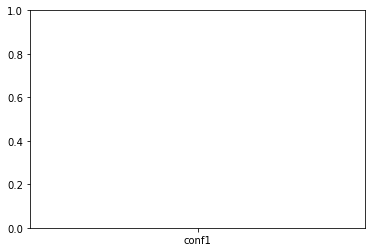

In [4]:
plt.bar(['conf1', 'feat1', 'conf2', 'feat2', 'conf3', 'feat3'],
        cond_accuracy_means,
        color='grey',
        yerr=cond_accuracy_stds)
plt.show()
